In [1]:
# Step 1: Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Set random seed for reproducibility
np.random.seed(42)


In [2]:
# Step 2: Create financial dataset based on real reported figures

data = {
    "Company": ["Monsoon", "Seasalt Cornwall"],
    "Revenue (£m)": [212.2, 150.0],
    "EBITDA (£m)": [8.0, 11.0],
    "PreTaxProfit (£m)": [1.0, 4.4],
    "Stores": [180, 79],
    "OnlineSalesGrowth (%)": [12, 8],
    "InternationalSales (%)": [15, 11]
}

financial_df = pd.DataFrame(data)

# Calculate profit margin
financial_df["ProfitMargin (%)"] = (financial_df["PreTaxProfit (£m)"] / financial_df["Revenue (£m)"]) * 100

financial_df


,Company,Revenue (£m),EBITDA (£m),PreTaxProfit (£m),Stores,OnlineSalesGrowth (%),InternationalSales (%),ProfitMargin (%)
0,Monsoon,212.2,8.0,1.0,180,12,15,0.471254
1,Seasalt Cornwall,150.0,11.0,4.4,79,8,11,2.933333


In [3]:
# Step 3: Create demographic dataset

demographics = {
    "AgeGroup": ["18-24", "25-34", "35-44", "45-54", "55+"],
    "Monsoon_Customers (%)": [15, 30, 25, 20, 10],
    "Seasalt_Customers (%)": [10, 20, 25, 25, 20],
    "Female (%)": [70, 75, 80, 78, 72],
    "Male (%)": [30, 25, 20, 22, 28],
    "AverageIncome (£)": [22000, 28000, 35000, 42000, 39000]
}

demo_df = pd.DataFrame(demographics)

demo_df


,AgeGroup,Monsoon_Customers (%),Seasalt_Customers (%),Female (%),Male (%),AverageIncome (£)
0,18-24,15,10,70,30,22000
1,25-34,30,20,75,25,28000
2,35-44,25,25,80,20,35000
3,45-54,20,25,78,22,42000
4,55+,10,20,72,28,39000


In [4]:
# Step 4: Generate synthetic regional sales dataset

regions = ["London", "South West", "South East", "Midlands", "North", "Scotland"]

sales_data = []

for company in ["Monsoon", "Seasalt Cornwall"]:
    for region in regions:
        sales = np.random.randint(5, 50)  # million
        profit = sales * np.random.uniform(0.02, 0.12)
        
        sales_data.append({
            "Company": company,
            "Region": region,
            "Sales (£m)": sales,
            "Profit (£m)": round(profit, 2),
            "ProfitMargin (%)": round((profit / sales) * 100, 2)
        })

sales_df = pd.DataFrame(sales_data)

sales_df


,Company,Region,Sales (£m),Profit (£m),ProfitMargin (%)
0,Monsoon,London,43,4.29,9.97
1,Monsoon,South West,19,1.77,9.32
2,Monsoon,South East,25,0.89,3.56
3,Monsoon,Midlands,23,0.69,3.00
4,Monsoon,North,15,1.60,10.66
5,Monsoon,Scotland,40,1.37,3.43
6,Seasalt Cornwall,London,7,0.15,2.21
7,Seasalt Cornwall,South West,6,0.55,9.22
8,Seasalt Cornwall,South East,34,1.40,4.12
9,Seasalt Cornwall,Midlands,25,2.04,8.17


In [5]:
# Step 5: Combine datasets

merged_df = sales_df.merge(financial_df, on="Company")

merged_df.head()


,Company,Region,Sales (£m),Profit (£m),ProfitMargin (%)_x,Revenue (£m),EBITDA (£m),PreTaxProfit (£m),Stores,OnlineSalesGrowth (%),InternationalSales (%),ProfitMargin (%)_y
0,Monsoon,London,43,4.29,9.97,212.2,8.0,1.0,180,12,15,0.471254
1,Monsoon,South West,19,1.77,9.32,212.2,8.0,1.0,180,12,15,0.471254
2,Monsoon,South East,25,0.89,3.56,212.2,8.0,1.0,180,12,15,0.471254
3,Monsoon,Midlands,23,0.69,3.00,212.2,8.0,1.0,180,12,15,0.471254
4,Monsoon,North,15,1.60,10.66,212.2,8.0,1.0,180,12,15,0.471254


In [6]:
# Step 6: Save datasets

financial_df.to_csv("financial_data.csv", index=False)
demo_df.to_csv("demographic_data.csv", index=False)
sales_df.to_csv("regional_sales_data.csv", index=False)
merged_df.to_csv("merged_company_data.csv", index=False)

print("Datasets saved successfully.")


Datasets saved successfully.


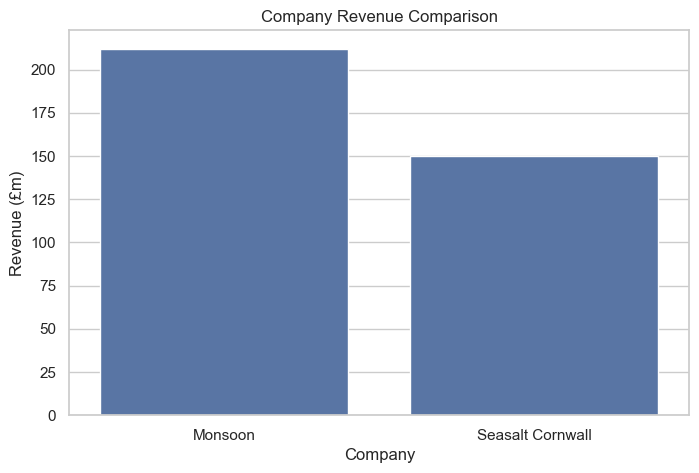

In [7]:
# Step 7.1: Revenue comparison

plt.figure(figsize=(8,5))
sns.barplot(x="Company", y="Revenue (£m)", data=financial_df)
plt.title("Company Revenue Comparison")
plt.show()


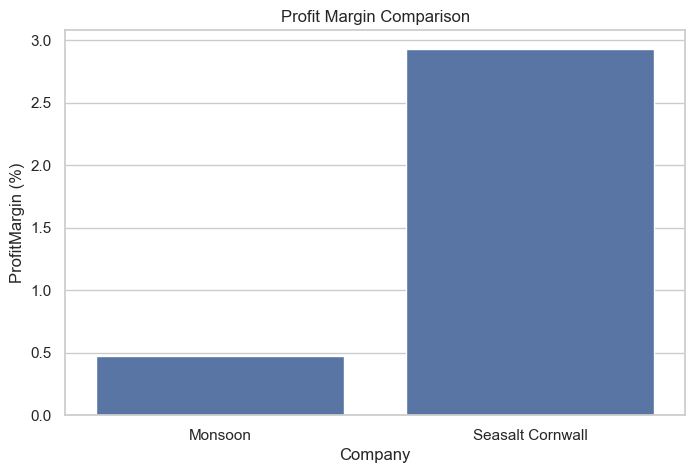

In [8]:
# Step 7.2: Profit margin comparison

plt.figure(figsize=(8,5))
sns.barplot(x="Company", y="ProfitMargin (%)", data=financial_df)
plt.title("Profit Margin Comparison")
plt.show()


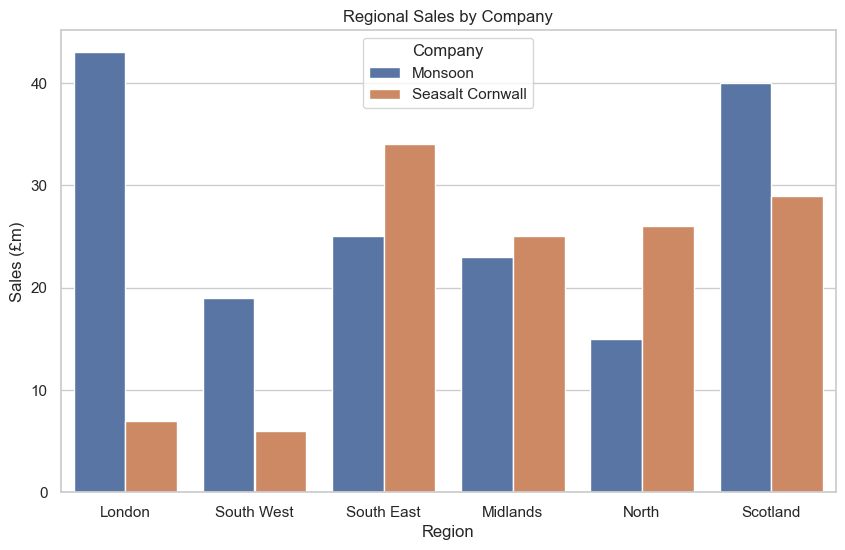

In [9]:
# Step 7.3: Regional sales

plt.figure(figsize=(10,6))
sns.barplot(x="Region", y="Sales (£m)", hue="Company", data=sales_df)
plt.title("Regional Sales by Company")
plt.show()


In [10]:
# Step 8: Statistical analysis

merged_df.describe()


,Sales (£m),Profit (£m),ProfitMargin (%)_x,Revenue (£m),EBITDA (£m),PreTaxProfit (£m),Stores,OnlineSalesGrowth (%),InternationalSales (%),ProfitMargin (%)_y
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000
mean,24.333333,1.392500,5.886667,181.100000,9.500000,2.700000,129.50000,10.000000,13.000000,1.702293
std,11.547005,1.075683,3.296169,32.482891,1.566699,1.775592,52.74553,2.088932,2.088932,1.285779
min,6.000000,0.150000,2.070000,150.000000,8.000000,1.000000,79.00000,8.000000,11.000000,0.471254
25%,18.000000,0.655000,3.322500,150.000000,8.000000,1.000000,79.00000,8.000000,11.000000,0.471254
50%,25.000000,1.385000,4.515000,181.100000,9.500000,2.700000,129.50000,10.000000,13.000000,1.702293
75%,30.250000,1.642500,9.245000,212.200000,11.000000,4.400000,180.00000,12.000000,15.000000,2.933333
max,43.000000,4.290000,10.660000,212.200000,11.000000,4.400000,180.00000,12.000000,15.000000,2.933333


In [11]:
# Prepare ML dataset

ml_df = merged_df.copy()

# Encode company
ml_df["Company"] = ml_df["Company"].map({
    "Monsoon": 0,
    "Seasalt Cornwall": 1
})

ml_df.head()


,Company,Region,Sales (£m),Profit (£m),ProfitMargin (%)_x,Revenue (£m),EBITDA (£m),PreTaxProfit (£m),Stores,OnlineSalesGrowth (%),InternationalSales (%),ProfitMargin (%)_y
0,0,London,43,4.29,9.97,212.2,8.0,1.0,180,12,15,0.471254
1,0,South West,19,1.77,9.32,212.2,8.0,1.0,180,12,15,0.471254
2,0,South East,25,0.89,3.56,212.2,8.0,1.0,180,12,15,0.471254
3,0,Midlands,23,0.69,3.00,212.2,8.0,1.0,180,12,15,0.471254
4,0,North,15,1.60,10.66,212.2,8.0,1.0,180,12,15,0.471254
